# Read Data

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
# Train Data:
# Store - the store number
# Dept - the department number
# Date - the week
# Weekly_Sales -  sales for the given department in the given store
# IsHoliday - whether the week is a special holiday week

train_df = pd.read_csv('/content/drive/MyDrive/Walmart_Recruiting/Data/train.csv.zip')
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
# Test Data:
# Store - the store number
# Dept - the department number
# Date - the week
# IsHoliday - whether the week is a special holiday week

test_df = pd.read_csv('/content/drive/MyDrive/Walmart_Recruiting/Data/test.csv.zip')
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
# Info about stores
stores_df = pd.read_csv('/content/drive/MyDrive/Walmart_Recruiting/Data/stores.csv')
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
# Features data:
# Store - the store number
# Date - the week
# Temperature - average temperature in the region
# Fuel_Price - cost of fuel in the region
# MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
# CPI - the consumer price index
# Unemployment - the unemployment rate
# IsHoliday - whether the week is a special holiday week

features_df = pd.read_csv('/content/drive/MyDrive/Walmart_Recruiting/Data/features.csv.zip')
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


# Merge Data

In [7]:
train_merged = train_df.merge(stores_df, how='left').merge(features_df, how='left')
test_merged = test_df.merge(stores_df, how='left').merge(features_df, how='left')

In [8]:
train_merged.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [9]:
test_merged.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


# Feature Engineering (Date)

In [10]:
def convert_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = (df.Date.dt.isocalendar().week)*1.0

In [11]:
convert_date(train_merged)
convert_date(test_merged)

In [12]:
train_merged.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,WeekOfYear
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5.0
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,12,6.0
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,19,7.0
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,26,8.0
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,5,9.0


In [13]:
test_merged.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,WeekOfYear
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,2012,11,2,44.0
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,2012,11,9,45.0
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,2012,11,16,46.0
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,2012,11,23,47.0
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,2012,11,30,48.0


In [14]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [15]:
train_merged.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Type,0
Size,0
Temperature,0
Fuel_Price,0
MarkDown1,270889


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [17]:
missing_values = train_merged.isna().sum()
px.bar(missing_values,
       x=missing_values.index,
       y=missing_values.values,
       title="Missing Values",
       labels=dict(x="Variable", y="Missing Values"), template='plotly_dark')

# EDA

In [18]:
type_counts = train_merged.Type.value_counts().to_dict()
df = pd.DataFrame(list(type_counts.items()), columns=['StoreType', 'Counts'])

fig = px.pie(df, values='Counts', names='StoreType',
             title='Percentage of Store Types',labels='StoreType', template='plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [19]:
avg_weekly_sales = train_merged.groupby('Type')['Weekly_Sales'].mean().to_dict()

df = pd.DataFrame(list(avg_weekly_sales.items()), columns=['StoreType', 'AverageSales'])

fig = px.bar(df,
             x="StoreType",
             y="AverageSales",
             title="Average Weekly Sales Per Store",
             template='plotly_dark')
fig.show()

In [20]:
import plotly.graph_objs as go

sales_2010 = train_merged[(train_merged.Year == 2010)].groupby('Month')['Weekly_Sales'].mean().to_dict()
df_2010 = pd.DataFrame(list(sales_2010.items()), columns=['Month', 'AvgMonthlySales2010'])

sales_2011 = train_merged[(train_merged.Year == 2011)].groupby('Month')['Weekly_Sales'].mean().to_dict()
df_2011 = pd.DataFrame(list(sales_2011.items()), columns=['Month', 'AvgMonthlySales2011'])

sales_2012 = train_merged[(train_merged.Year == 2012)].groupby('Month')['Weekly_Sales'].mean().to_dict()
df_2012 = pd.DataFrame(list(sales_2012.items()), columns=['Month', 'AvgMonthlySales2012'])


monthly_merged = df_2010.merge(df_2011, how='right', on='Month').merge(df_2012, how='left', on='Month')


trace_1 = go.Bar(x = df_2010.Month,
                y = df_2010.AvgMonthlySales2010,
                name = "AvgMonthlySales2010")

trace_2 = go.Bar(x = df_2011.Month,
                y = df_2011.AvgMonthlySales2011,
                name = "AvgMonthlySales2011")

trace_3 = go.Bar(x = df_2012.Month,
                y = df_2012.AvgMonthlySales2012,
                name = "AvgMonthlySales2012")

data = [trace_1, trace_2, trace_3]

layout = go.Layout(barmode = "group",
                   template='plotly_dark',
                   xaxis_title="Month",
                   yaxis_title="Average Monthly Sales",
                   title="Average Monthly Sales Per Year")

fig = go.Figure(data = data, layout = layout)
fig.update_xaxes(dtick=1)
fig.show()

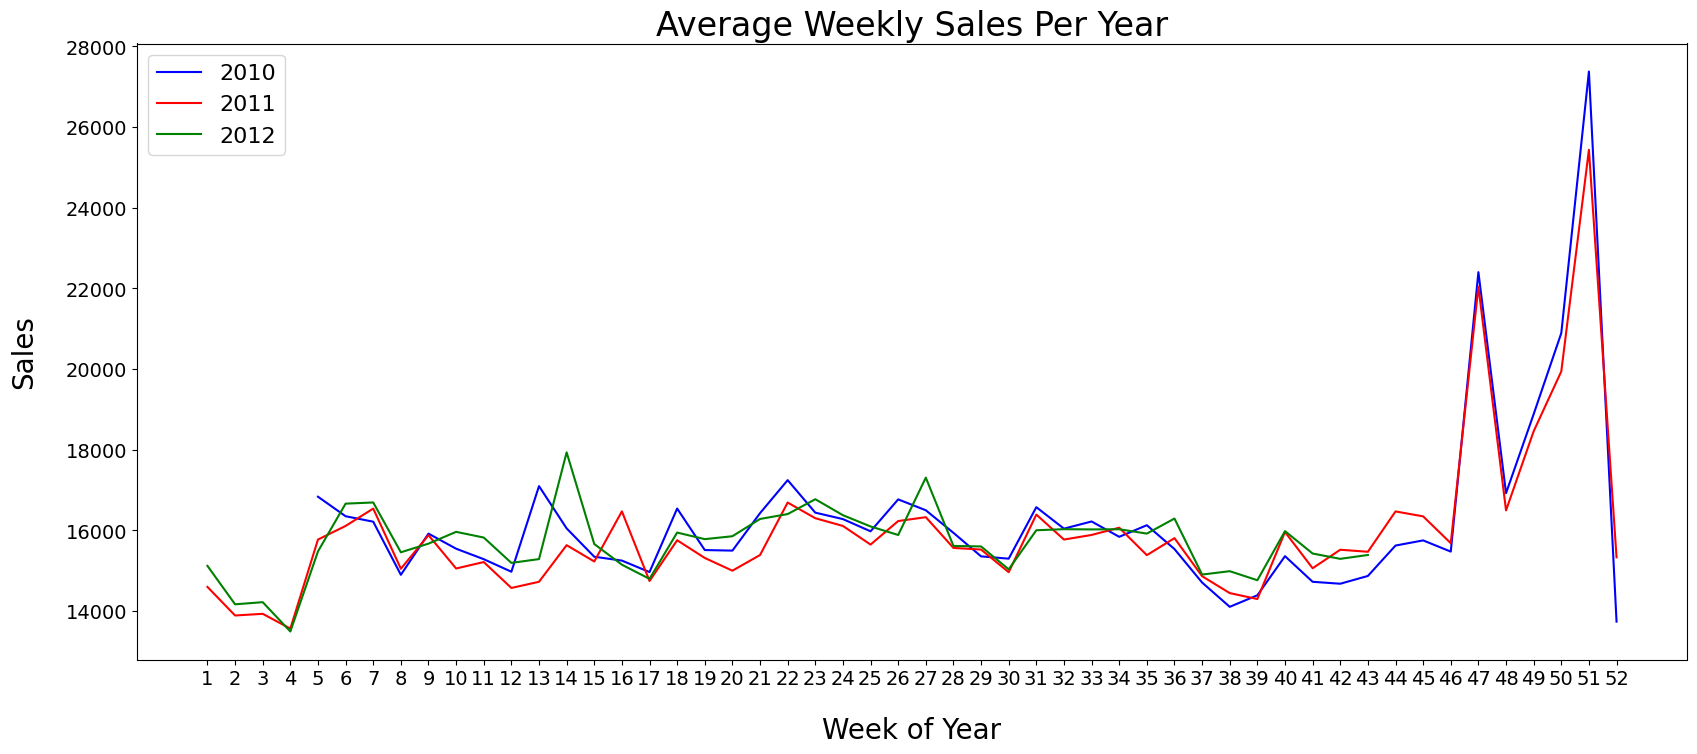

In [21]:
weekly_sales_2010 = train_merged[train_merged.Year==2010].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2011 = train_merged[train_merged.Year==2011].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2012 = train_merged[train_merged.Year==2012].groupby('WeekOfYear')['Weekly_Sales'].mean()

plt.figure(figsize=(20,8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values, 'b')
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values, 'r')
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values, 'g')

plt.xticks(np.arange(1, 53, step=1), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales Per Year", fontsize=24)
plt.legend(['2010', '2011', '2012'], fontsize=16);

In [22]:
store_sales = train_merged.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

fig = px.bar(store_sales,
             x=store_sales.index,
             y=store_sales.values,
             title="Average Weekly Sales Per Store",
             labels={'x':'Stores', 'y':'Sales'},
             template='plotly_dark')

fig.update_xaxes(tick0=1, dtick=1)
fig.show()

In [23]:
from plotly.subplots import make_subplots

store_sales_2010 = train_merged[train_merged.Year==2010].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2010_df = pd.DataFrame(list(store_sales_2010.items()), columns=['Store', 'AvgSales2010'])

store_sales_2011 = train_merged[train_merged.Year==2011].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2011_df = pd.DataFrame(list(store_sales_2011.items()), columns=['Store', 'AvgSales2011'])

store_sales_2012 = train_merged[train_merged.Year==2012].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2012_df = pd.DataFrame(list(store_sales_2012.items()), columns=['Store', 'AvgSales2012'])

fig = make_subplots(rows=3, cols=1, subplot_titles=("Average Weekly Sales Per Store 2010", "Average Weekly Sales Per Store 2011", "Average Weekly Sales Per Store 2012"))

fig.add_trace(go.Bar(x=store2010_df.Store, y=store2010_df.AvgSales2010,),1, 1)

fig.add_trace(go.Bar(x=store2011_df.Store, y=store2011_df.AvgSales2011,),2, 1)

fig.add_trace(go.Bar(x=store2012_df.Store, y=store2012_df.AvgSales2012,),3, 1)

fig.update_layout(template='plotly_dark', showlegend=False, height=1500)

fig.update_xaxes(title_text="Store", row=1, col=1)
fig.update_xaxes(title_text="Store", row=2, col=1)
fig.update_xaxes(title_text="Store", row=3, col=1)

fig.update_yaxes(title_text="Average Sales", row=1, col=1)
fig.update_yaxes(title_text="Average Sales", row=2, col=1)
fig.update_yaxes(title_text="Average Sales", row=3, col=1)

fig.update_xaxes(tick0=1, dtick=1)
fig.show()

In [24]:
dept_sales = train_merged.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False)

fig = px.bar(dept_sales,
             x=dept_sales.values,
             y=dept_sales.index,
             template = 'plotly_dark',
             title="Average Weekly Sales Per Department",
             labels={'x':'Dept', 'y':'Sales'},
             orientation='h', height=1200, width=1000)

fig.update_yaxes(tick0=1, dtick=1)

fig.show()

In [25]:
dept_sales_2010 = train_merged[train_merged.Year==2010].groupby('Dept')['Weekly_Sales'].mean().to_dict()
dept2010_df = pd.DataFrame(list(dept_sales_2010.items()), columns=['Dept', 'AvgSales2010'])

dept_sales_2011 = train_merged[train_merged.Year==2011].groupby('Dept')['Weekly_Sales'].mean().to_dict()
dept2011_df = pd.DataFrame(list(dept_sales_2011.items()), columns=['Dept', 'AvgSales2011'])

dept_sales_2012 = train_merged[train_merged.Year==2012].groupby('Dept')['Weekly_Sales'].mean().to_dict()
dept2012_df = pd.DataFrame(list(dept_sales_2012.items()), columns=['Dept', 'AvgSales2012'])

fig = make_subplots(rows=1, cols=3, subplot_titles=("Average Weekly Sales Per Department 2010", "Average Weekly Sales Per Department 2011", "Average Weekly Sales Per Department 2012"))

fig.add_trace(go.Bar(x=dept2010_df.AvgSales2010, y=dept2010_df.Dept, orientation='h',),1, 1)

fig.add_trace(go.Bar(x=dept2011_df.AvgSales2011, y=dept2011_df.Dept, orientation='h',),1, 2)

fig.add_trace(go.Bar(x=dept2012_df.AvgSales2012, y=dept2012_df.Dept, orientation='h',),1, 3)

fig.update_layout(template = 'plotly_dark', showlegend=False, height=1000)

fig.update_xaxes(title_text="Average Sales", row=1, col=1)
fig.update_xaxes(title_text="Average Sales", row=1, col=2)
fig.update_xaxes(title_text="Average Sales", row=1, col=3)

fig.update_yaxes(title_text="Department", row=1, col=1)
fig.update_yaxes(title_text="Department", row=1, col=2)
fig.update_yaxes(title_text="Department", row=1, col=3)

fig.update_yaxes(tick0=1, dtick=1)
fig.show()

In [26]:
holiday_sales = train_merged.groupby('IsHoliday')['Weekly_Sales'].mean()
holiday_counts = train_merged.IsHoliday.value_counts()

fig = make_subplots(rows=1, cols=2, subplot_titles=("Holidays/Nonholidays Average Sales", "Holidays/Nonholidays Counts"))

fig.add_trace(go.Bar(x=holiday_sales.values, y=holiday_sales.index, orientation='h',),1, 1)

fig.add_trace(go.Bar(x=holiday_counts.values, y=holiday_counts.index, orientation='h',),1, 2)

fig.update_layout(template='plotly_dark', showlegend=False)
fig.show()

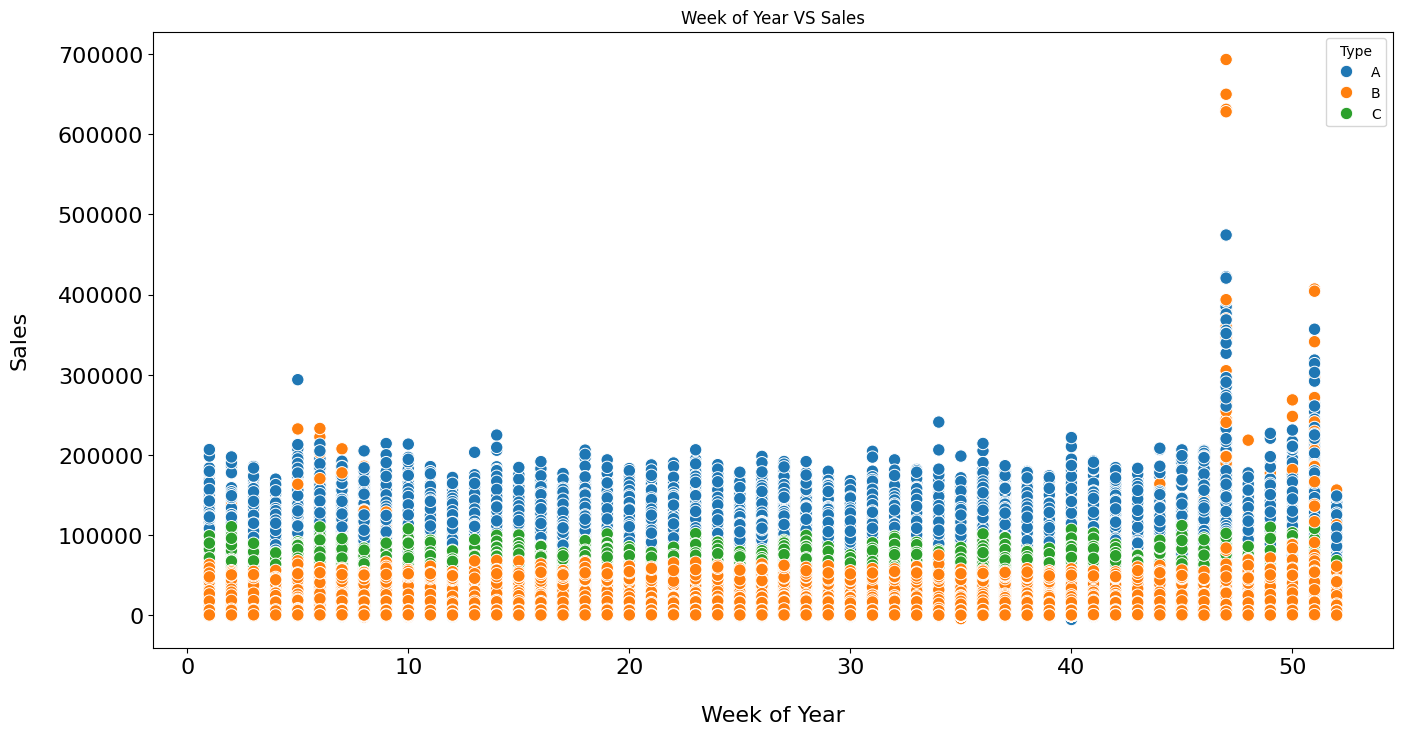

In [27]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=train_merged.WeekOfYear, y=train_merged.Weekly_Sales, hue=train_merged.Type, s=80);

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Week of Year', fontsize=16, labelpad=20)
plt.ylabel('Sales', fontsize=16, labelpad=20)
plt.title('Week of Year VS Sales');

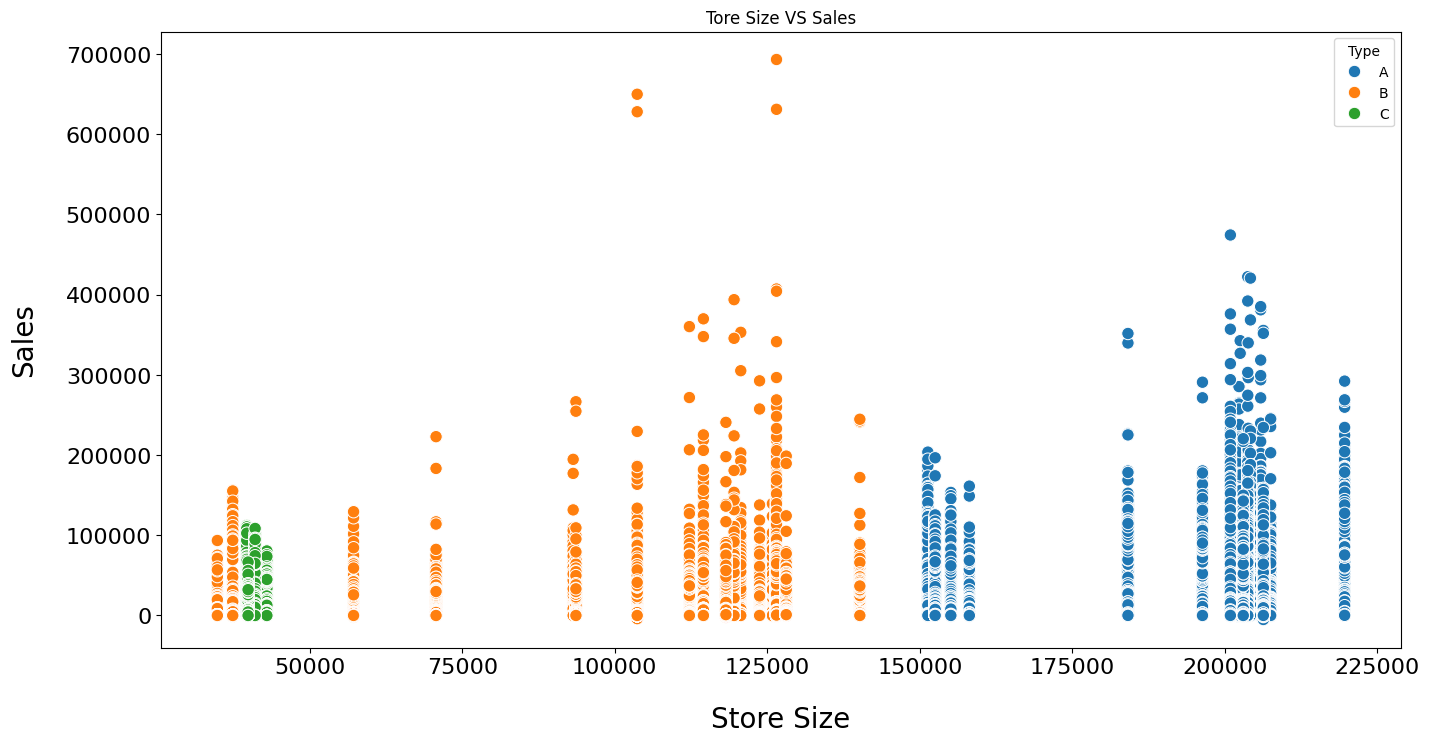

In [28]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=train_merged.Size, y=train_merged.Weekly_Sales, hue=train_merged.Type, s=80);

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Store Size', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)
plt.title('Tore Size VS Sales');

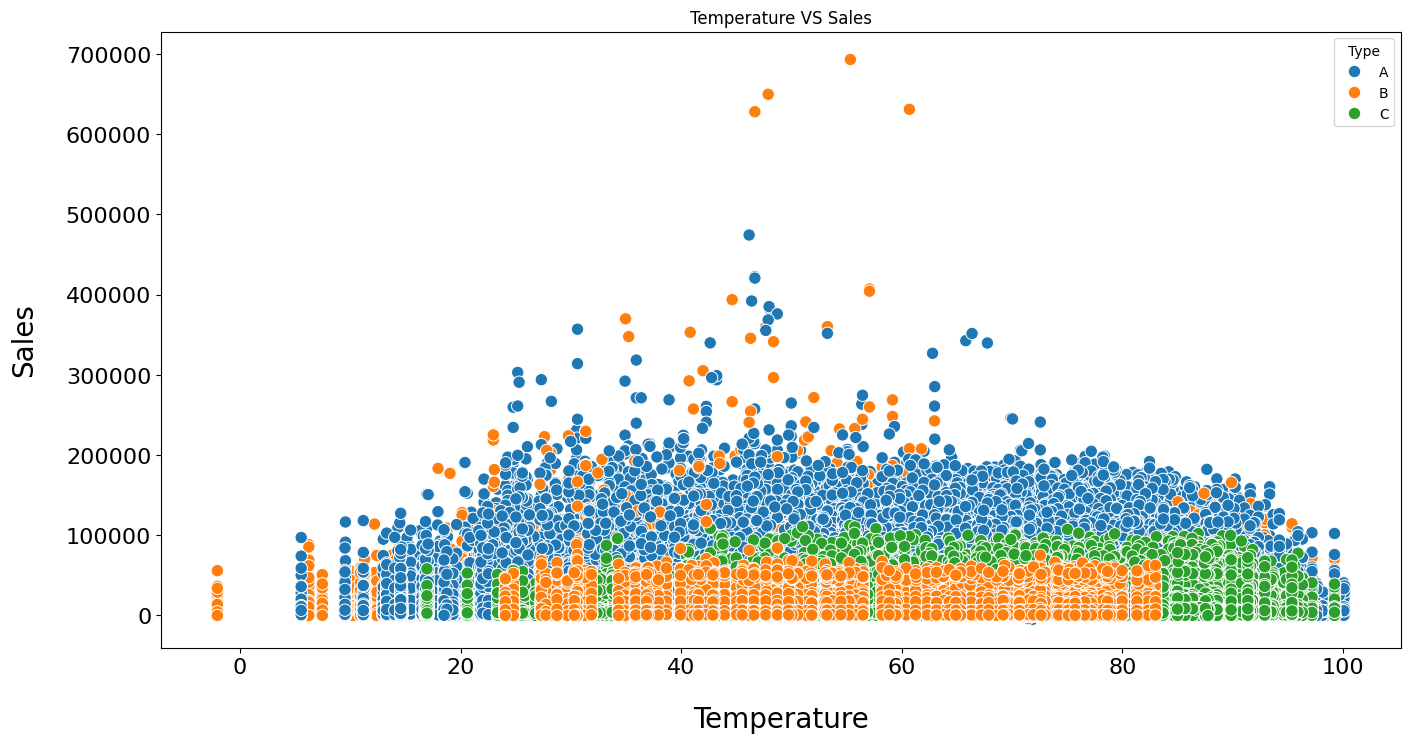

In [29]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=train_merged.Temperature, y=train_merged.Weekly_Sales, hue=train_merged.Type, s=80);

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Temperature', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)
plt.title('Temperature VS Sales');

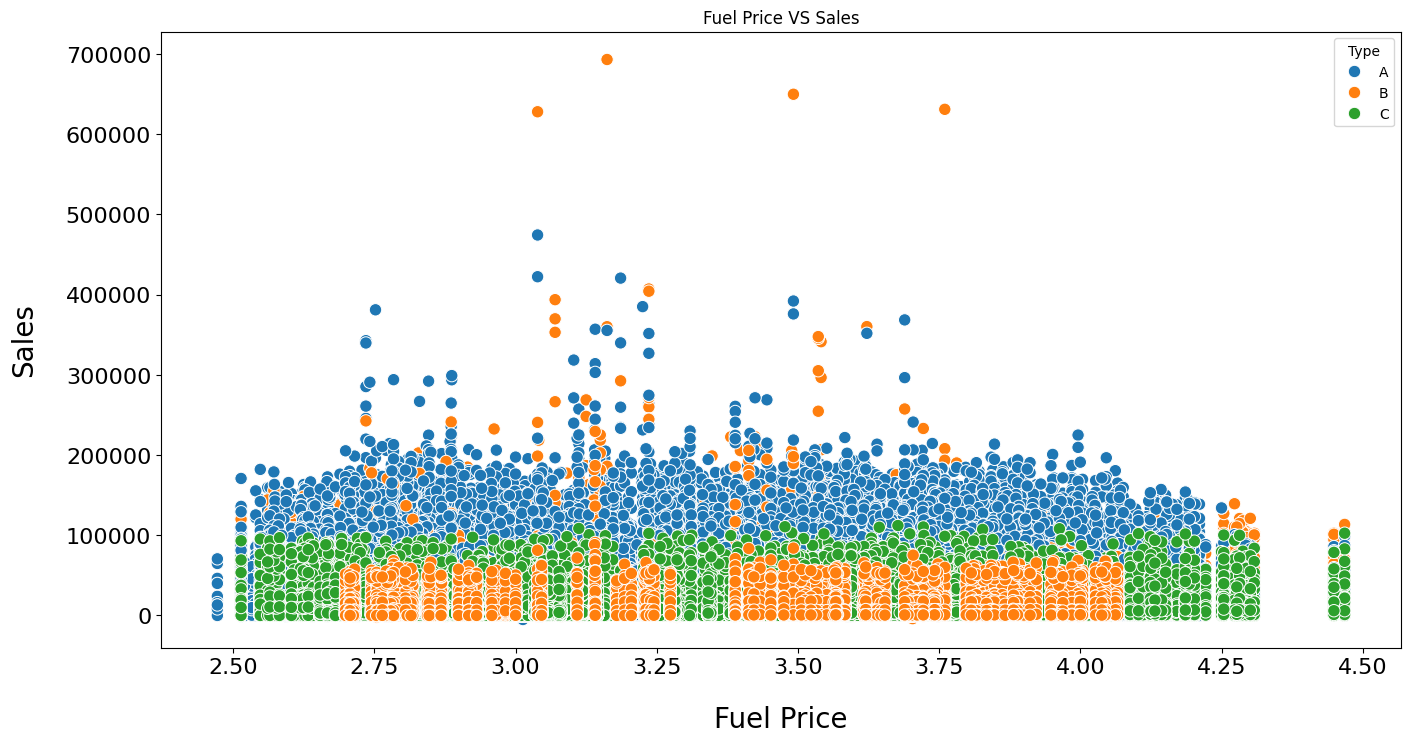

In [30]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=train_merged.Fuel_Price, y=train_merged.Weekly_Sales, hue=train_merged.Type, s=80);

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Fuel Price', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)
plt.title('Fuel Price VS Sales');

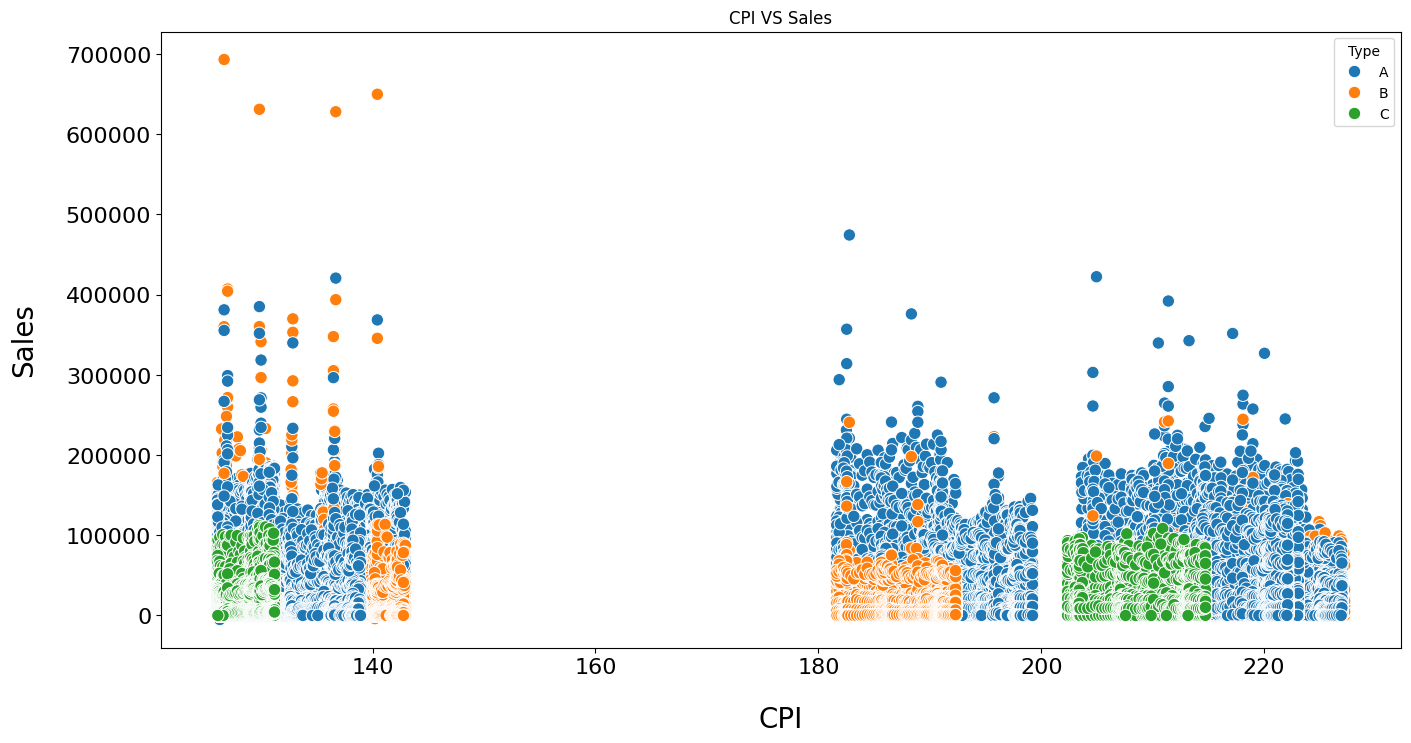

In [31]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=train_merged.CPI, y=train_merged.Weekly_Sales, hue=train_merged.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('CPI', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)
plt.title('CPI VS Sales');

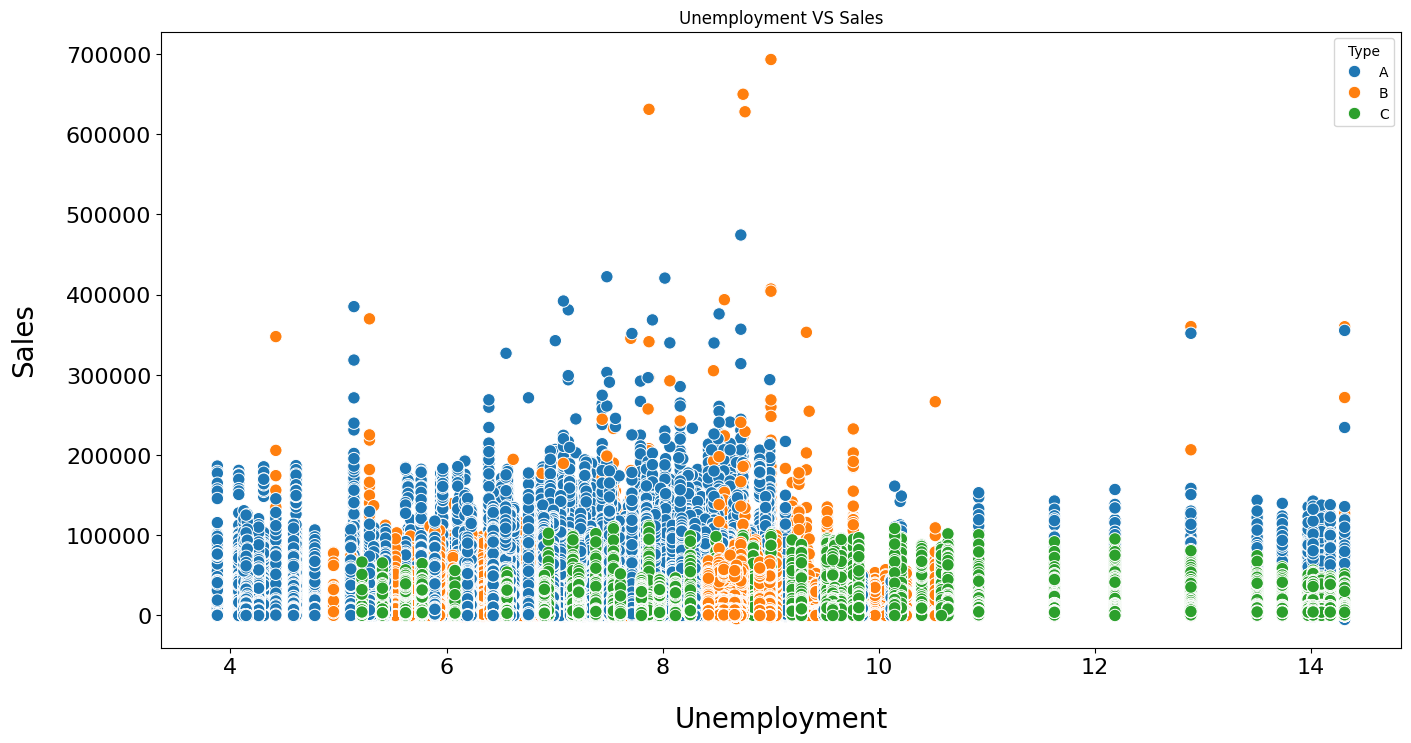

In [32]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=train_merged.Unemployment, y=train_merged.Weekly_Sales, hue=train_merged.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Unemployment', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)
plt.title('Unemployment VS Sales');

In [33]:
storetype_values = {'A' : 3, 'B' : 2, 'C' : 1}

train_merged['Type_Numeric'] = train_merged.Type.map(storetype_values)
test_merged['Type_Numeric'] = train_merged.Type.map(storetype_values)

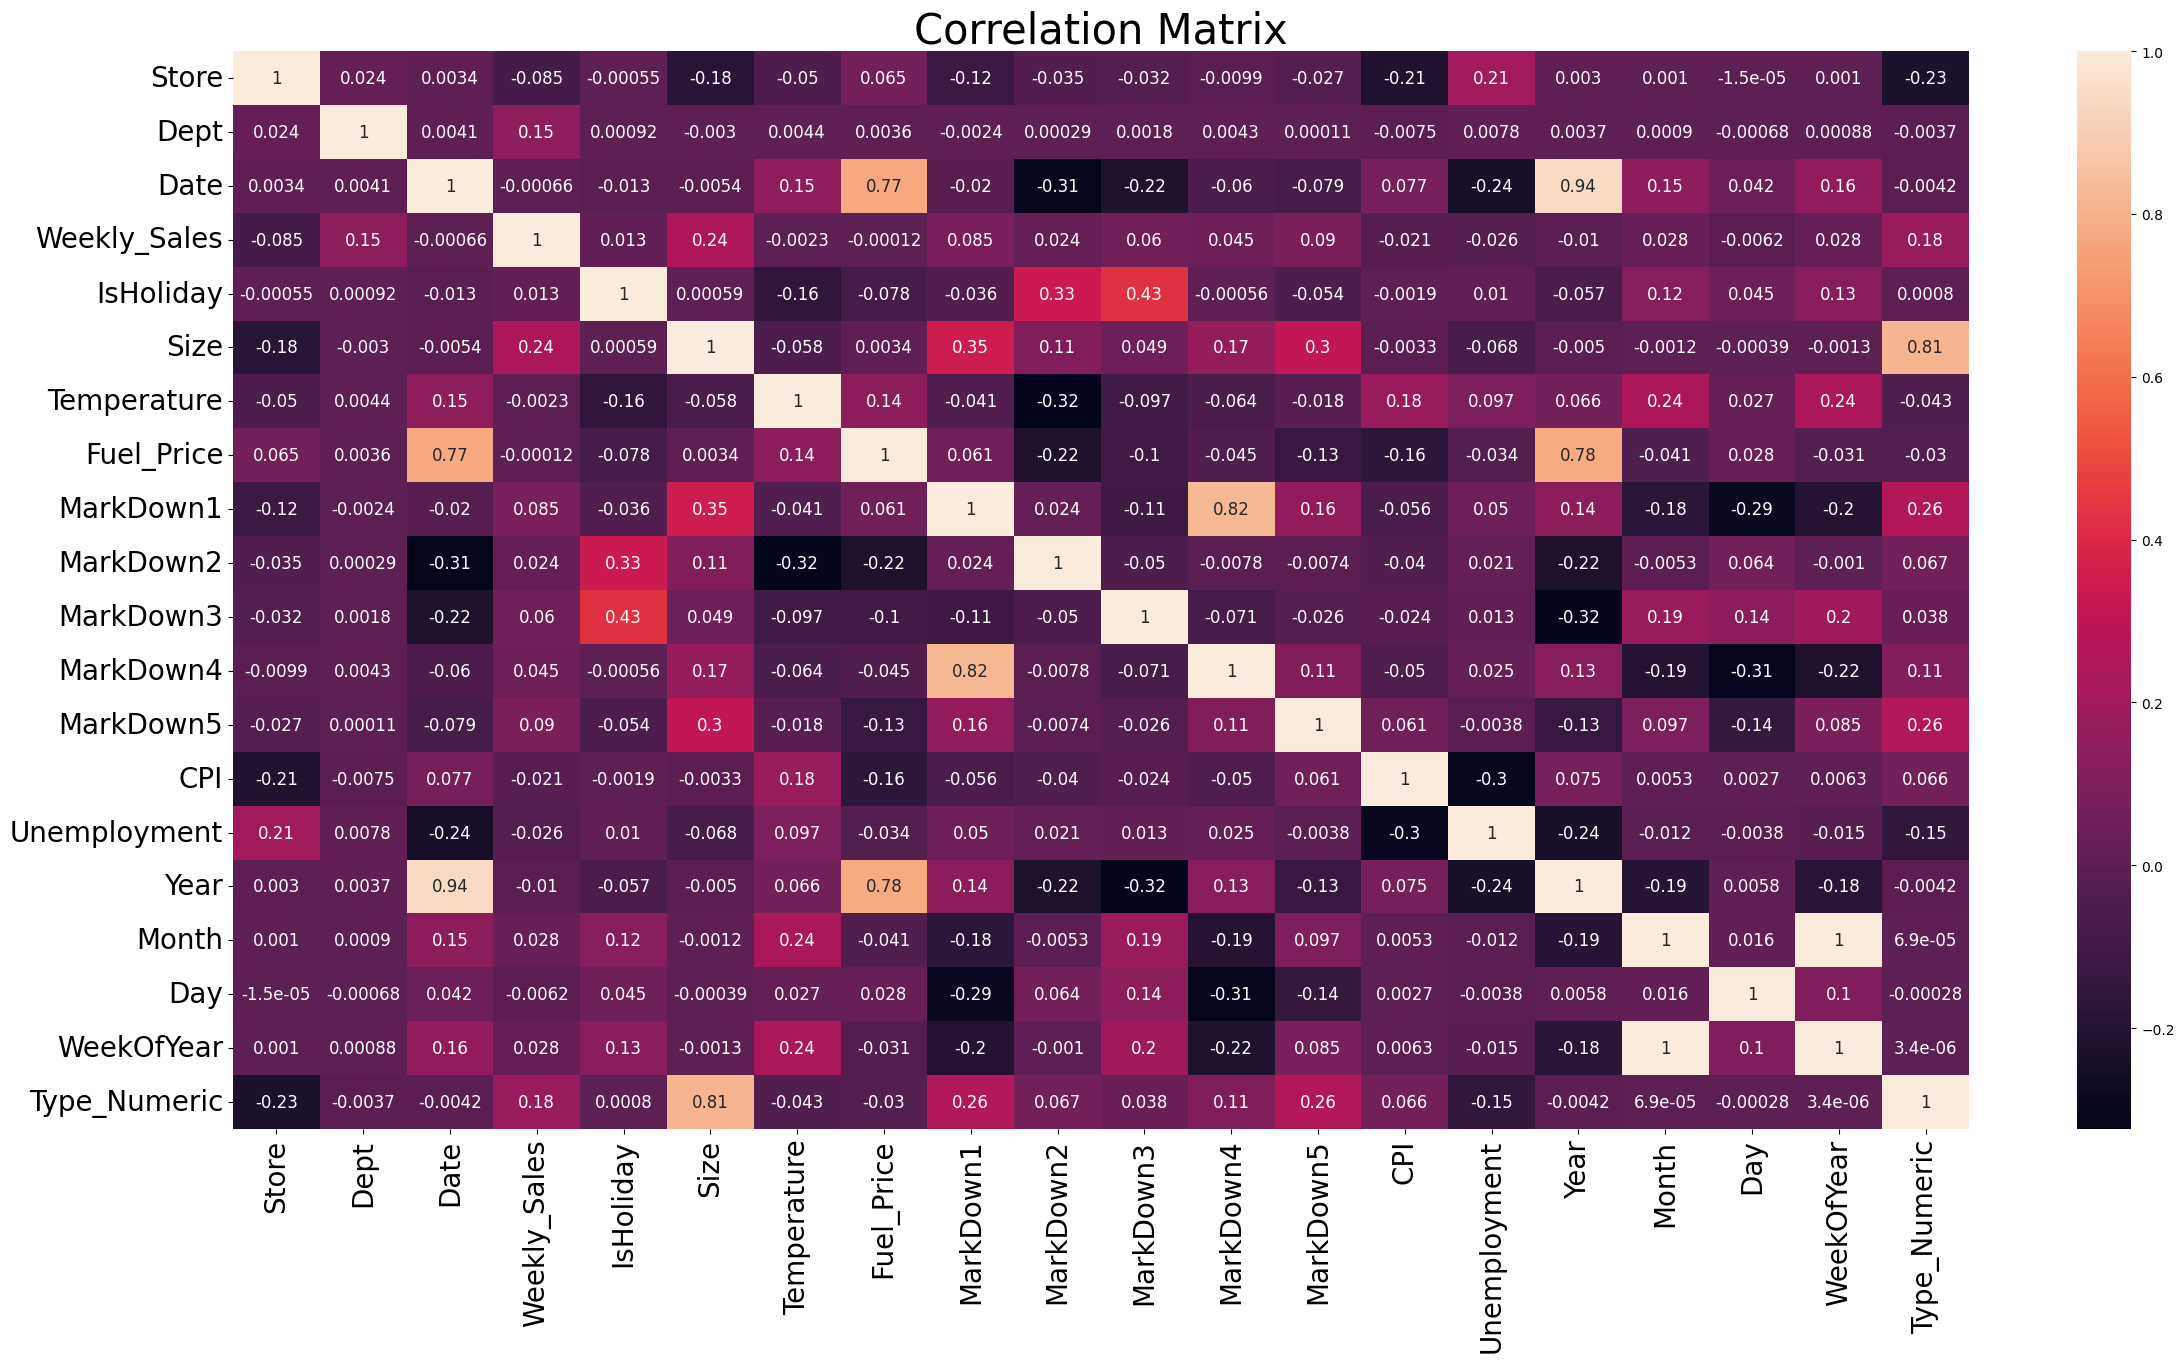

In [34]:
plt.figure(figsize=(28,14))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

sns.heatmap(train_merged.drop(columns=['Type']).corr(), annot=True, annot_kws={'size':12})
plt.title('Correlation Matrix', fontsize=30);

* Markdown1-5, Temperature, Fuel_Price, CPI, Unemployment have week correlation with Weekly_Sales- Drop
* Month, Day will be dropped, because WeekOfYear has the same information

# Feature Selection

In [35]:
columns_to_drop = ['Date', 'Temperature', 'Fuel_Price', 'Type', 'MarkDown1', 'MarkDown2', 'MarkDown3',
             'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Month', 'Day']

In [36]:
train_merged = train_merged.drop(columns=columns_to_drop)
test_merged = test_merged.drop(columns=columns_to_drop)

In [37]:
train_merged.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Year,WeekOfYear,Type_Numeric
0,1,1,24924.50,False,151315,2010,5.0,3
1,1,1,46039.49,True,151315,2010,6.0,3
2,1,1,41595.55,False,151315,2010,7.0,3
3,1,1,19403.54,False,151315,2010,8.0,3
4,1,1,21827.90,False,151315,2010,9.0,3


# Feature Engineering (Holidays)

In [38]:
# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13                         ---> WeekOfYear = 6
# Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13                            ---> WeekOfYear = 36
# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13                      ---> WeekOfYear = 47
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13                         ---> WeekOfYear = 52

train_merged['SuperBowlWeek'] = train_merged['WeekOfYear'].apply(lambda x: 1 if x == 6.0 else 0)
train_merged['LaborDay'] = train_merged['WeekOfYear'].apply(lambda x: 1 if x == 36.0 else 0)
train_merged['Tranksgiving'] = train_merged['WeekOfYear'].apply(lambda x: 1 if x == 47.0 else 0)
train_merged['Christmas'] = train_merged['WeekOfYear'].apply(lambda x: 1 if x == 52.0 else 0)

test_merged['SuperBowlWeek'] = test_merged['WeekOfYear'].apply(lambda x: 1 if x == 6.0 else 0)
test_merged['LaborDay'] = test_merged['WeekOfYear'].apply(lambda x: 1 if x == 36.0 else 0)
test_merged['Tranksgiving'] = test_merged['WeekOfYear'].apply(lambda x: 1 if x == 47.0 else 0)
test_merged['Christmas'] = test_merged['WeekOfYear'].apply(lambda x: 1 if x == 52.0 else 0)

In [39]:
train_merged['IsHoliday'] = train_merged['IsHoliday'].astype(int)
test_merged['IsHoliday'] = test_merged['IsHoliday'].astype(int)

In [40]:
train_merged.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Year,WeekOfYear,Type_Numeric,SuperBowlWeek,LaborDay,Tranksgiving,Christmas
0,1,1,24924.50,0,151315,2010,5.0,3,0,0,0,0
1,1,1,46039.49,1,151315,2010,6.0,3,1,0,0,0
2,1,1,41595.55,0,151315,2010,7.0,3,0,0,0,0
3,1,1,19403.54,0,151315,2010,8.0,3,0,0,0,0
4,1,1,21827.90,0,151315,2010,9.0,3,0,0,0,0


In [41]:
input_cols = train_merged.columns.to_list()
input_cols.remove('Weekly_Sales')
target_col = 'Weekly_Sales'

# Preprocessing Pipeline

In [42]:
class PreprocessingPipeline:

    def __init__(self):
        self.storetype_map = {'A': 3, 'B': 2, 'C': 1}
        self.columns_to_drop = [
            'Date', 'Temperature', 'Fuel_Price', 'Type', 'MarkDown1', 'MarkDown2', 'MarkDown3',
            'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Month', 'Day'
        ]

    def fit(self, train_df=None, stores_df=None, features_df=None):
        pass

    def transform(self, df, stores_df, features_df):
        # 1. Merge data
        df = df.merge(stores_df, how='left').merge(features_df, how='left')

        # 2. Convert 'Date'
        df['Date'] = pd.to_datetime(df['Date'])
        df['Year'] = df['Date'].dt.year
        df['Month'] = df['Date'].dt.month
        df['Day'] = df['Date'].dt.day
        df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(float)

        # 3. Encode 'Type'
        df['Type_Numeric'] = df['Type'].map(self.storetype_map)

        # 4. Encode 'IsHoliday'
        df['IsHoliday'] = df['IsHoliday'].astype(int)

        # 5. Special Holidays
        df['SuperBowlWeek'] = df['WeekOfYear'].apply(lambda x: 1 if x == 6.0 else 0)
        df['LaborDay'] = df['WeekOfYear'].apply(lambda x: 1 if x == 36.0 else 0)
        df['Tranksgiving'] = df['WeekOfYear'].apply(lambda x: 1 if x == 47.0 else 0)
        df['Christmas'] = df['WeekOfYear'].apply(lambda x: 1 if x == 52.0 else 0)

        # 6. Drop unused columns (ensure only those that exist are dropped)
        drop_cols = [col for col in self.columns_to_drop if col in df.columns]
        df = df.drop(columns=drop_cols)

        return df

    def fit_transform(self, df, stores_df, features_df):
        self.fit()
        return self.transform(df, stores_df, features_df)


In [43]:
def split_train_val(df, val_ratio=0.2):
    train_list = []
    val_list = []

    for _, group in df.groupby(["Store", "Dept"]):
        group = group.sort_values("Date")
        n = len(group)
        n_val = int(n * val_ratio)

        val = group.iloc[-n_val:]
        train = group.iloc[:-n_val]

        train_list.append(train)
        val_list.append(val)

    train_df = pd.concat(train_list).reset_index(drop=True)
    val_df = pd.concat(val_list).reset_index(drop=True)
    return train_df, val_df

In [44]:
train, val = split_train_val(train_df)

X_train = train.drop(columns=['Weekly_Sales'])
y_train = train['Weekly_Sales']

X_val = val.drop(columns=['Weekly_Sales'])
y_val = val['Weekly_Sales']

In [45]:
X_test = test_df.copy()

In [46]:
preprocessor = PreprocessingPipeline()

X_train = preprocessor.fit_transform(X_train, stores_df, features_df)
X_val = preprocessor.transform(X_val, stores_df, features_df)
X_test = preprocessor.transform(X_test, stores_df, features_df)

In [47]:
from sklearn.metrics import make_scorer
import pandas as pd

def WMAE(real, predicted, weights):
    wmae = np.round(np.sum(weights*abs(real-predicted))/(np.sum(weights)), 2)
    return wmae


def wmae_scorer(val_df):
    def scorer(y_true, y_pred):
        # Ensure y_true is a pandas Series and get its index
        if not isinstance(y_true, pd.Series):
             y_true = pd.Series(y_true)

        # Use the index of y_true to get the corresponding 'IsHoliday' values from the original val_df
        weights = val_df.loc[y_true.index, 'IsHoliday'].apply(lambda x: 5 if x else 1).values

        return WMAE(y_true.values, y_pred, weights)

    return make_scorer(scorer, greater_is_better=False, response_method='predict')

In [54]:
import random
from itertools import product
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit
from lightgbm import LGBMRegressor



param_grid = {
    "scaler": [StandardScaler(), MinMaxScaler(), None],
    "model__n_estimators": [100, 200, 400],
    "model__max_depth": [10, 15, 20],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__subsample": [0.6, 0.8, 1.0],
    "model__colsample_bytree": [0.6, 0.8, 1.0],
    "model__num_leaves": [20, 30, 50]
}


pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1))
])

# Create the WMAE scorer instance, passing the validation DataFrame
wmae_scorer_inst = wmae_scorer(val)


# Combine train and val for fit, use PredefinedSplit
X_all = pd.concat([X_train, X_val])
y_all = pd.concat([y_train, y_val])
test_fold = [-1] * len(X_train) + [0] * len(X_val)

search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=30,
    scoring=wmae_scorer_inst,
    cv=PredefinedSplit(test_fold),
    verbose=2,
    random_state=42
)

search.fit(X_all, y_all)

Fitting 1 folds for each of 30 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[CV] END model__colsample_bytree=1.0, model__learning_rate=0.05, model__max_depth=15, model__n_estimators=400, model__num_leaves=30, model__subsample=0.6, scaler=MinMaxScaler(); total time=   5.8s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=15, model__n_estimators=100, model__num_leaves=50, model__subsample=0.6, scaler=None; total time=   2.0s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=10, model__n_estimators=200, model__num_leaves=20, model__subsample=1.0, scaler=None; total time=   6.2s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=15, model__n_estimators=100, model__num_leaves=30, model__subsample=0.6, scaler=None; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[CV] END model__colsample_bytree=0.8, model__learning_rate=0.05, model__max_depth=10, model__n_estimators=100, model__num_leaves=50, model__subsample=0.8, scaler=StandardScaler(); total time=   2.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=20, model__n_estimators=200, model__num_leaves=30, model__subsample=0.8, scaler=StandardScaler(); total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[CV] END model__colsample_bytree=1.0, model__learning_rate=0.05, model__max_depth=10, model__n_estimators=200, model__num_leaves=50, model__subsample=1.0, scaler=StandardScaler(); total time=   6.9s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=10, model__n_estimators=200, model__num_leaves=20, model__subsample=0.8, scaler=None; total time=   2.9s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=20, model__n_estimators=200, model__num_leaves=20, model__subsample=1.0, scaler=None; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[CV] END model__colsample_bytree=1.0, model__learning_rate=0.05, model__max_depth=10, model__n_estimators=400, model__num_leaves=30, model__subsample=1.0, scaler=MinMaxScaler(); total time=   8.9s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=20, model__n_estimators=200, model__num_leaves=30, model__subsample=0.6, scaler=MinMaxScaler(); total time=   4.1s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=10, model__n_estimators=100, model__num_leaves=20, model__subsample=1.0, scaler=None; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[CV] END model__colsample_bytree=1.0, model__learning_rate=0.05, model__max_depth=15, model__n_estimators=100, model__num_leaves=20, model__subsample=1.0, scaler=MinMaxScaler(); total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[CV] END model__colsample_bytree=0.8, model__learning_rate=0.05, model__max_depth=15, model__n_estimators=100, model__num_leaves=20, model__subsample=0.6, scaler=StandardScaler(); total time=   4.5s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[CV] END model__colsample_bytree=0.6, model__learning_rate=0.01, model__max_depth=15, model__n_estimators=200, model__num_leaves=20, model__subsample=0.6, scaler=MinMaxScaler(); total time=   5.5s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[CV] END model__colsample_bytree=0.6, model__learning_rate=0.01, model__max_depth=20, model__n_estimators=200, model__num_leaves=50, model__subsample=0.8, scaler=MinMaxScaler(); total time=   7.4s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[CV] END model__colsample_bytree=0.6, model__learning_rate=0.05, model__max_depth=20, model__n_estimators=100, model__num_leaves=20, model__subsample=0.8, scaler=MinMaxScaler(); total time=   2.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=15, model__n_estimators=200, model__num_leaves=30, model__subsample=0.6, scaler=StandardScaler(); total time=   3.7s
[CV] END model__colsample_bytree=0.6, model__learning_rate=0.01, model__max_depth=10, model__n_estimators=200, model__num_leaves=20, model__subsample=0.6, scaler=None; total time=   3.4s
[CV] END model__colsample_bytree=0.6, model__learning_rate=0.05, model__max_depth=20, model__n_estimators=100, model__num_leaves=20, model__subsample=0.8, scaler=None; total time=   4.8s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=10, model__n_estimators=100, model__num_leaves=30, model__subsample=0.6, scaler=None; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=10, model__n_estimators=200, model__num_leaves=50, model__subsample=0.8, scaler=StandardScaler(); total time=   3.6s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[CV] END model__colsample_bytree=0.6, model__learning_rate=0.05, model__max_depth=10, model__n_estimators=100, model__num_leaves=30, model__subsample=1.0, scaler=MinMaxScaler(); total time=   2.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[CV] END model__colsample_bytree=1.0, model__learning_rate=0.05, model__max_depth=15, model__n_estimators=400, model__num_leaves=50, model__subsample=0.8, scaler=StandardScaler(); total time=   9.9s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=15, model__n_estimators=200, model__num_leaves=30, model__subsample=0.8, scaler=StandardScaler(); total time=   3.8s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[CV] END model__colsample_bytree=0.6, model__learning_rate=0.01, model__max_depth=20, model__n_estimators=100, model__num_leaves=20, model__subsample=1.0, scaler=StandardScaler(); total time=   4.9s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=20, model__n_estimators=400, model__num_leaves=50, model__subsample=0.6, scaler=StandardScaler(); total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=10, model__n_estimators=400, model__num_leaves=20, model__subsample=0.8, scaler=MinMaxScaler(); total time=   8.1s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=20, model__n_estimators=100, model__num_leaves=30, model__subsample=0.6, scaler=None; total time=   1.8s
[CV] END model__colsample_bytree=0.6, model__learning_rate=0.05, model__max_depth=15, model__n_estimators=400, model__num_leaves=20, model__subsample=0.8, scaler=None; total time=   5.9s


RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              LGBMRegressor(n_jobs=-1,
                                                            random_state=42,
                                                            verbose=-1))]),
                   n_iter=30,
                   param_distributions={'model__colsample_bytree': [0.6, 0.8,
                                                                    1.0],
                                        'model__learning_rate': [0.01, 0.05,
                                                                 0.1],
                                        'model__max_depth': [10, 15, 20],
                                        'model__n_estimators': [100, 200, 400],
                                        'model__num_leaves': [20, 30, 50],
                                        'model__subsample': [0.6, 0.8, 1.0],
                                        'scaler': [StandardScaler(),
                                                   MinMaxScaler(), None]},
                   random_state=42,
                   scoring=make_scorer(scorer, greater_is_better=False, response_method='predict'),
                   verbose=2)

In [55]:
print("Best scaler:", search.best_params_["scaler"])

print("Best model hyperparameters:")
for k, v in search.best_params_.items():
    if k != "scaler":
        print(f"  {k}: {v}")

print("Best score (WMAE):", -search.best_score_)

Best scaler: None
Best model hyperparameters:
  model__subsample: 1.0
  model__num_leaves: 20
  model__n_estimators: 200
  model__max_depth: 20
  model__learning_rate: 0.1
  model__colsample_bytree: 1.0
Best score (WMAE): 4189.58


In [60]:
final_pipeline = Pipeline([
    ("scaler", None),
    ("model", LGBMRegressor(
        n_estimators=200,
        max_depth=20,
        learning_rate=0.1,
        subsample=1.0,
        colsample_bytree=1.0,
        random_state=42,
        n_jobs=-1
    ))
])


final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', None),
                ('model',
                 LGBMRegressor(max_depth=20, n_estimators=200, n_jobs=-1,
                               random_state=42))])

In [61]:
# Predict on validation
y_val_pred = final_pipeline.predict(X_val)

# Calculate WMAE
weights_val = val["IsHoliday"].apply(lambda x: 5 if x else 1)
wmae_val = np.sum(weights_val * abs(y_val - y_val_pred)) / np.sum(weights_val)
print(f"WMAE on Validation Set: {round(wmae_val, 2)}")

WMAE on Validation Set: 4768.09


In [58]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Walmart_Recruiting/Data/sampleSubmission.csv.zip')
sample_submission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [59]:
y_test_pred = final_pipeline.predict(X_test)

sample_submission["Weekly_Sales"] = y_test_pred

sample_submission.to_csv("submission.csv", index=False)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

